# Figura de los perfiles de indisponibilidad

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams.update({'font.size': 13})

def createfig_heatmap_matplotlib(df, cols, titles):
    fechas = pd.date_range(start='01/01/2019 00:00', end='31/12/2019 23:00', freq='1H')
    df_fig = df.copy()
    df_fig['Hora'] = fechas.hour
    df_fig['day_of_year'] = fechas.dayofyear

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Crear un grid 2x2
    #fig.suptitle("Heatmaps Comparativos", fontsize=16)

    binary_cmap = sns.color_palette(["#030303", "#239B56"], as_cmap=True)  

    for i, ax in enumerate(axes.flat):  # Recorre los subgráficos
        col = cols[i]
        
        # Crear una matriz con valores (Día del año vs Hora)
        pivot_table = df_fig.pivot(index='Hora', columns='day_of_year', values=col)
        
        # Graficar con seaborn
        sns.heatmap(pivot_table, ax=ax, cmap=binary_cmap, cbar=False)
        
        # Configuración del gráfico
        ax.set_title(titles[i], fontsize=16)
        ax.set_xlabel("Día del año")
        ax.set_ylabel("Hora del día")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que no se sobreponga el título
    plt.savefig('Figuras/pdf/casos_perfiles_disp.pdf', format='pdf', transparent=True)
    plt.show()


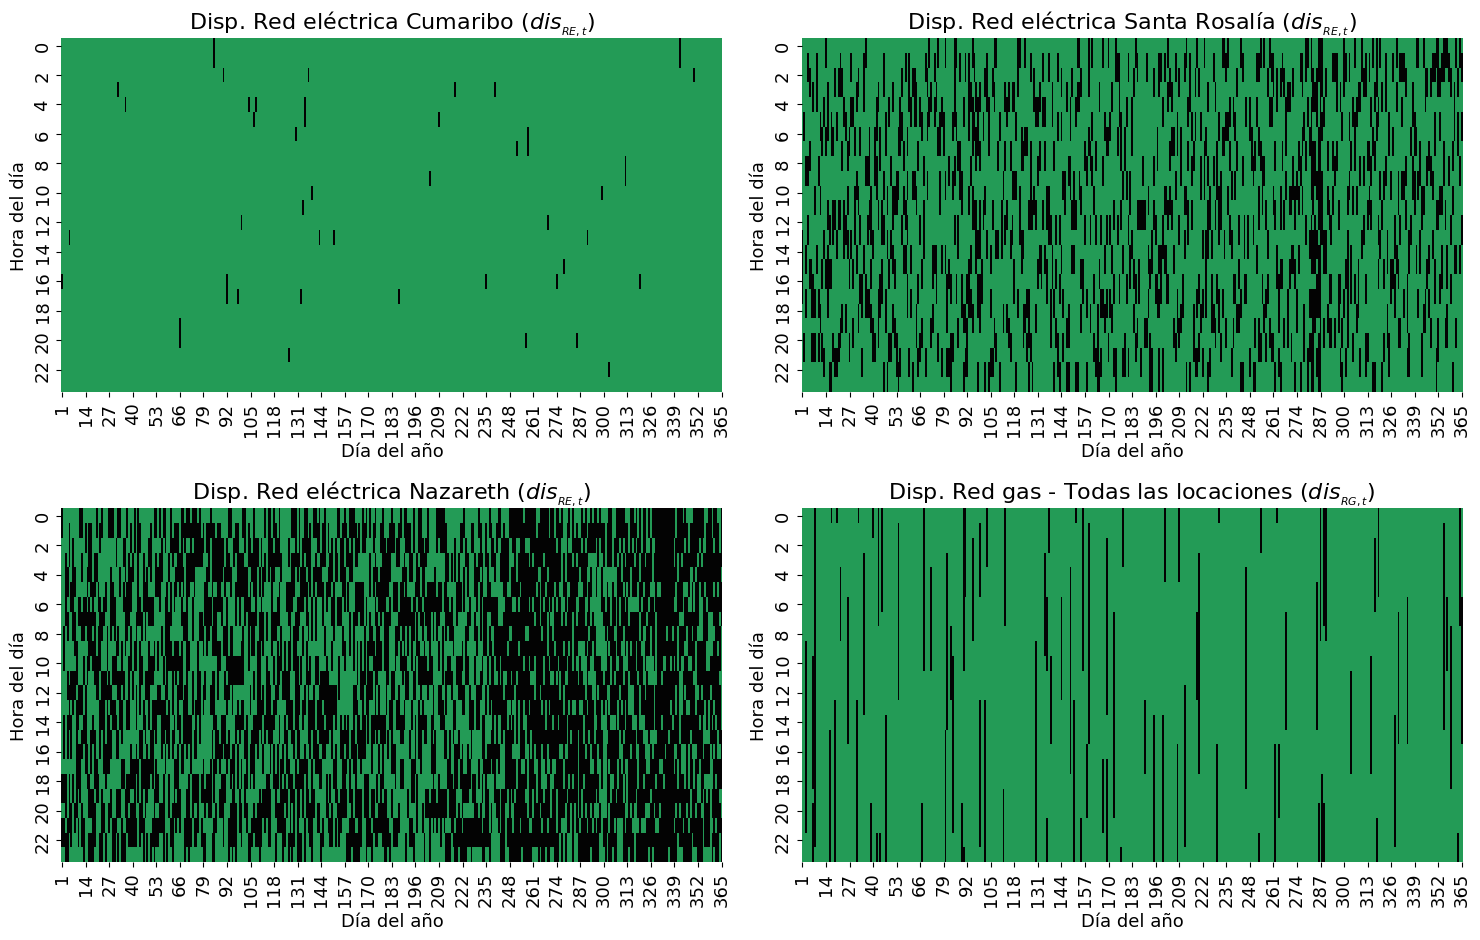

In [3]:
locaciones = ["cumaribo","rosalia","nazareth"]
dfs_series = [pd.read_excel("CaseData.xlsx", sheet_name=f"series_{loc}") for loc in locaciones]

df = pd.DataFrame()
for i, df_temp in enumerate(dfs_series):
    df[f"{locaciones[i]}"] = df_temp["AV_GRID_EL"]

df["gas"] = dfs_series[0]["AV_GRID_GAS"]

titles = [
    "Disp. Red eléctrica Cumaribo ($dis_{_{RE,t}}$)", 
    "Disp. Red eléctrica Santa Rosalía ($dis_{_{RE,t}}$)",
    "Disp. Red eléctrica Nazareth ($dis_{_{RE,t}}$)", 
    "Disp. Red gas - Todas las locaciones ($dis_{_{RG,t}}$)"
]

createfig_heatmap_matplotlib(df, df.columns.to_list(), titles=titles)

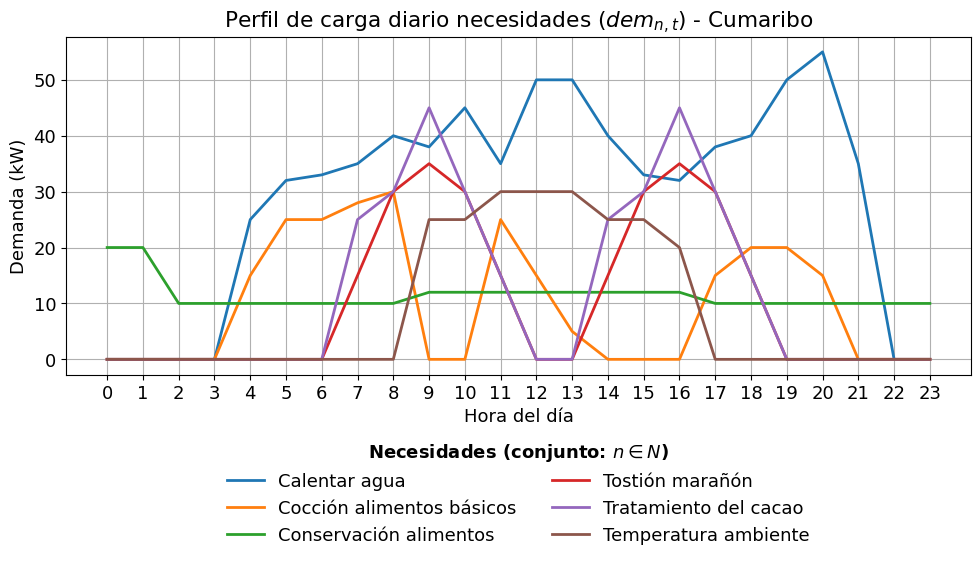

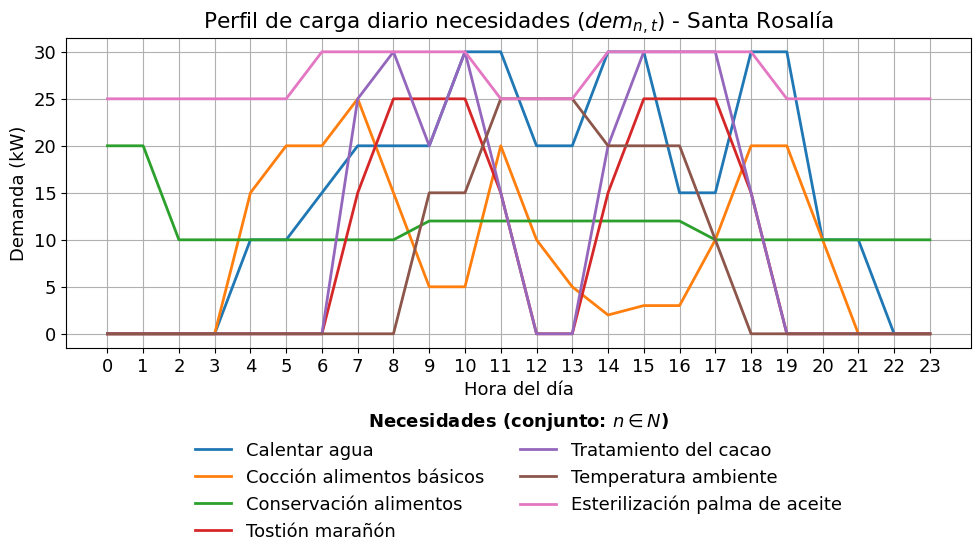

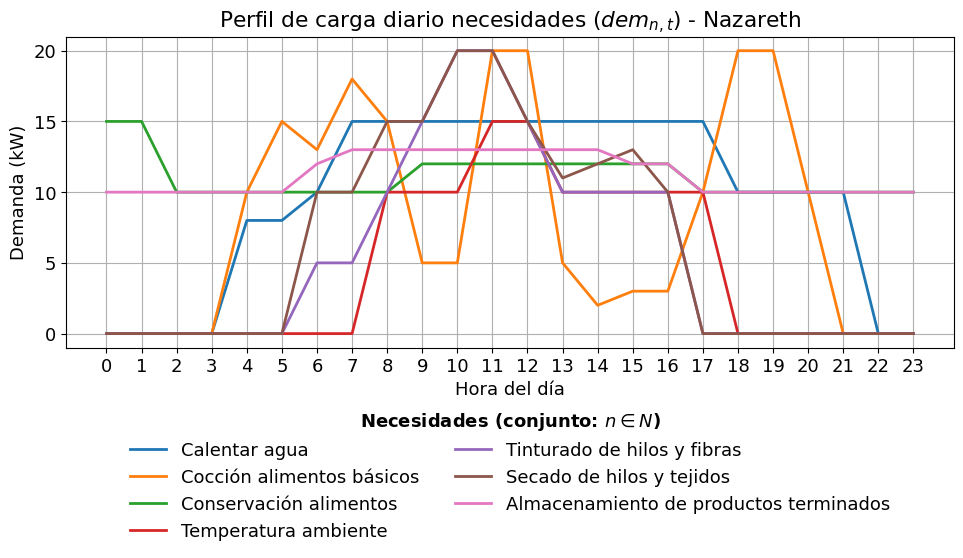

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Lista de nombres de hojas correspondientes a cada comunidad
sheets = ['necesidades_cumaribo', 'necesidades_rosalia', 'necesidades_nazareth']
titulos = ['Cumaribo','Santa Rosalía','Nazareth']

# Iterar sobre cada conjunto de datos
for i, sheet in enumerate(sheets):
    # Se asume que el archivo Excel con los datos se llama 'datos_necesidades.xlsx'
    df = pd.read_excel('CaseData.xlsx', sheet_name=sheet)
    
    # Las columnas '0' a '23' representan la demanda horaria (en kW)
    horas = [h for h in range(24)]
    
    plt.figure(figsize=(10, 6))
    # Graficar el perfil de cada necesidad
    for index, row in df.iterrows():
        perfil = row[horas].values
        plt.plot(range(24), perfil, label=re.sub(r'\s*\(.*?\)', '', row['Necesidad']).strip(), linewidth = 2)
    
    plt.xlabel('Hora del día')
    plt.ylabel('Demanda (kW)')
    plt.xticks(np.arange(24))  # Poner ticks en cada hora
    plt.title(rf'Perfil de carga diario necesidades ($dem_{{n,t}}$) - {titulos[i]}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False, title = "Necesidades (conjunto: $n \in N$)").get_title().set_fontweight("bold")
    plt.grid(True)
    plt.tight_layout()
    # Guardar la gráfica en un archivo PDF (opcional)
    plt.savefig(f'Figuras/pdf/casos_perfil_necesidades_{sheet.replace("necesidades_", "")}.pdf')
    plt.show()


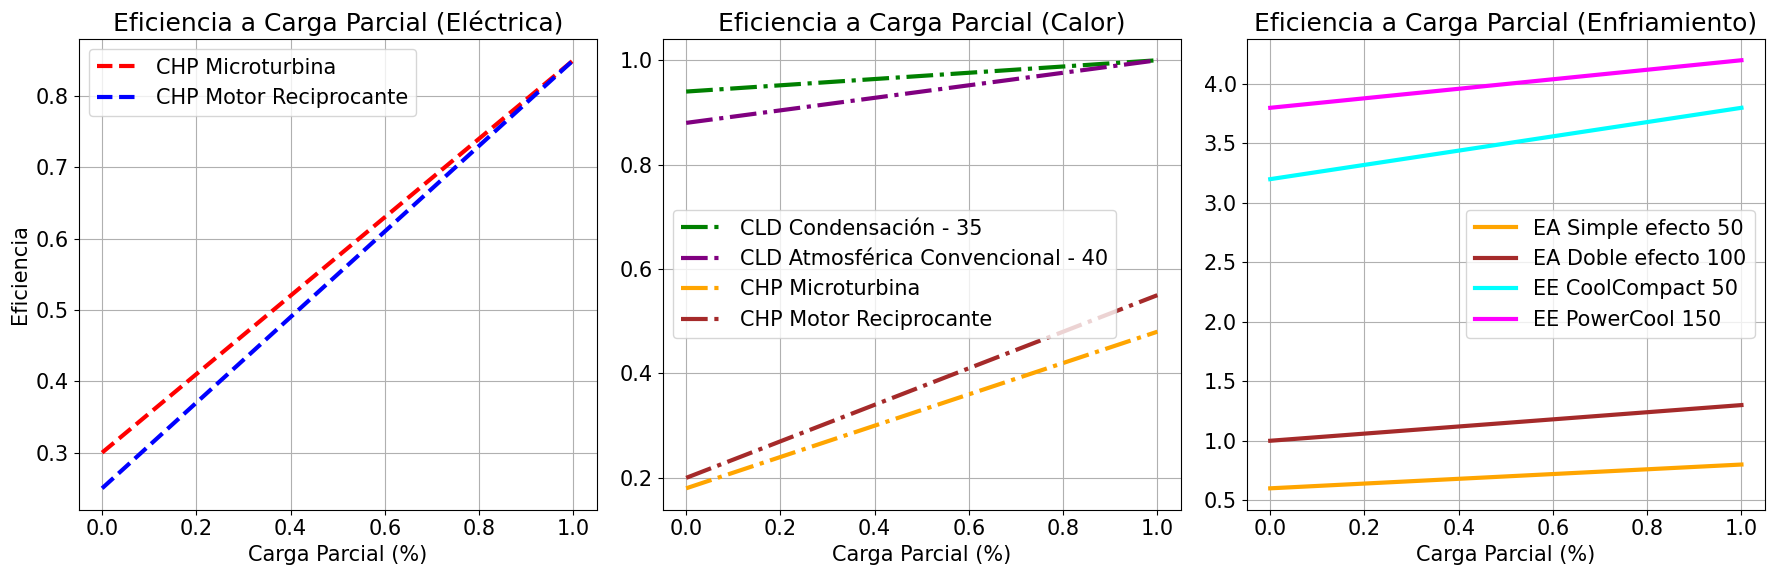

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

# Rango de carga parcial (0% a 100%)
x = np.linspace(0, 1, 100)

# Definición de eficiencias de cada tecnología (ν, σ)
techs_electricas = {
    "CHP Microturbina": (0.3, 0.55),
    "CHP Motor Reciprocante": (0.25, 0.6),
}

techs_termicas = {
    "CLD Condensación - 35": (0.94, 0.06),
    "CLD Atmosférica Convencional - 40": (0.88, 0.12),
    "CHP Microturbina": (0.18, 0.3),
    "CHP Motor Reciprocante": (0.2, 0.35),
}

techs_enfriamiento = {
    "EA Simple efecto 50": (0.6, 0.2),
    "EA Doble efecto 100": (1, 0.3),
    "EE CoolCompact 50": (3.2, 0.6),
    "EE PowerCool 150": (3.8, 0.4),
}

# Definir colores diferenciados
colores = ["red", "blue", "green", "purple", "orange", "brown", "cyan", "magenta"]

# Crear figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Eficiencias eléctricas
ax = axes[0]
for i, (tech, (nu, sigma)) in enumerate(techs_electricas.items()):
    ax.plot(x, nu + sigma * x, label=tech, color=colores[i], linestyle="--", linewidth = 3)
ax.set_title("Eficiencia a Carga Parcial (Eléctrica)")
ax.set_xlabel("Carga Parcial (%)")
ax.set_ylabel("Eficiencia")
ax.legend()
ax.grid(True)

# Gráfico 2: Eficiencias térmicas
ax = axes[1]
for i, (tech, (nu, sigma)) in enumerate(techs_termicas.items()):
    ax.plot(x, nu + sigma * x, label=tech, color=colores[i+2], linestyle="-.", linewidth = 3)
ax.set_title("Eficiencia a Carga Parcial (Calor)")
ax.set_xlabel("Carga Parcial (%)")
ax.legend()
ax.grid(True)

# Gráfico 3: Eficiencias de enfriamiento
ax = axes[2]
for i, (tech, (nu, sigma)) in enumerate(techs_enfriamiento.items()):
    ax.plot(x, nu + sigma * x, label=tech, color=colores[i+4], linestyle="-", linewidth = 3)
ax.set_title("Eficiencia a Carga Parcial (Enfriamiento)")
ax.set_xlabel("Carga Parcial (%)")
ax.legend()
ax.grid(True)

# Ajustar espaciado
plt.tight_layout()
plt.savefig(f'Figuras/pdf/eficiencias_carga_parcial.pdf')
plt.show()



In [2]:
from utils.maestros import Maestro_Resultados

maestros = {
    "cumaribo" : {
        "location" : {"lat":4.433, "lon":-69.8, "name":"Cumaribo", "name_data" : "cumaribo", "year_deterministic": 2020}        
    },
    "nazareth" : {
        "location" : {"lat":12.1755, "lon":-71.2831, "name":"nazareth", "name_data":"nazareth", "year_deterministic": 2020}        
    },
    "rosalia" : {
        "location" : {"lat":5.1261, "lon":-70.8755, "name":"rosalia", "name_data":"rosalia", "year_deterministic": 2020}
    }
}

for key, item in maestros.items():
    print(f"leyendo datos resultado para {key}...")
    maestros[key]["maestro"] = Maestro_Resultados(item["location"], estocastico = False)

leyendo datos resultado para cumaribo...
Variable no encontrada FirstStage
Variable no encontrada SecondStage
Variable no encontrada _eta
Variable no encontrada _z
leyendo datos resultado para nazareth...
Variable no encontrada FirstStage
Variable no encontrada SecondStage
Variable no encontrada _eta
Variable no encontrada _z
leyendo datos resultado para rosalia...
Variable no encontrada FirstStage
WARNING (W1001): Setting Var 'PTH_CHP_CUR[1647]' to a value
    `-1.4210854715202004e-14` (float) not in domain NonNegativeReals.
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1001
Variable no encontrada SecondStage
Variable no encontrada _eta
Variable no encontrada _z


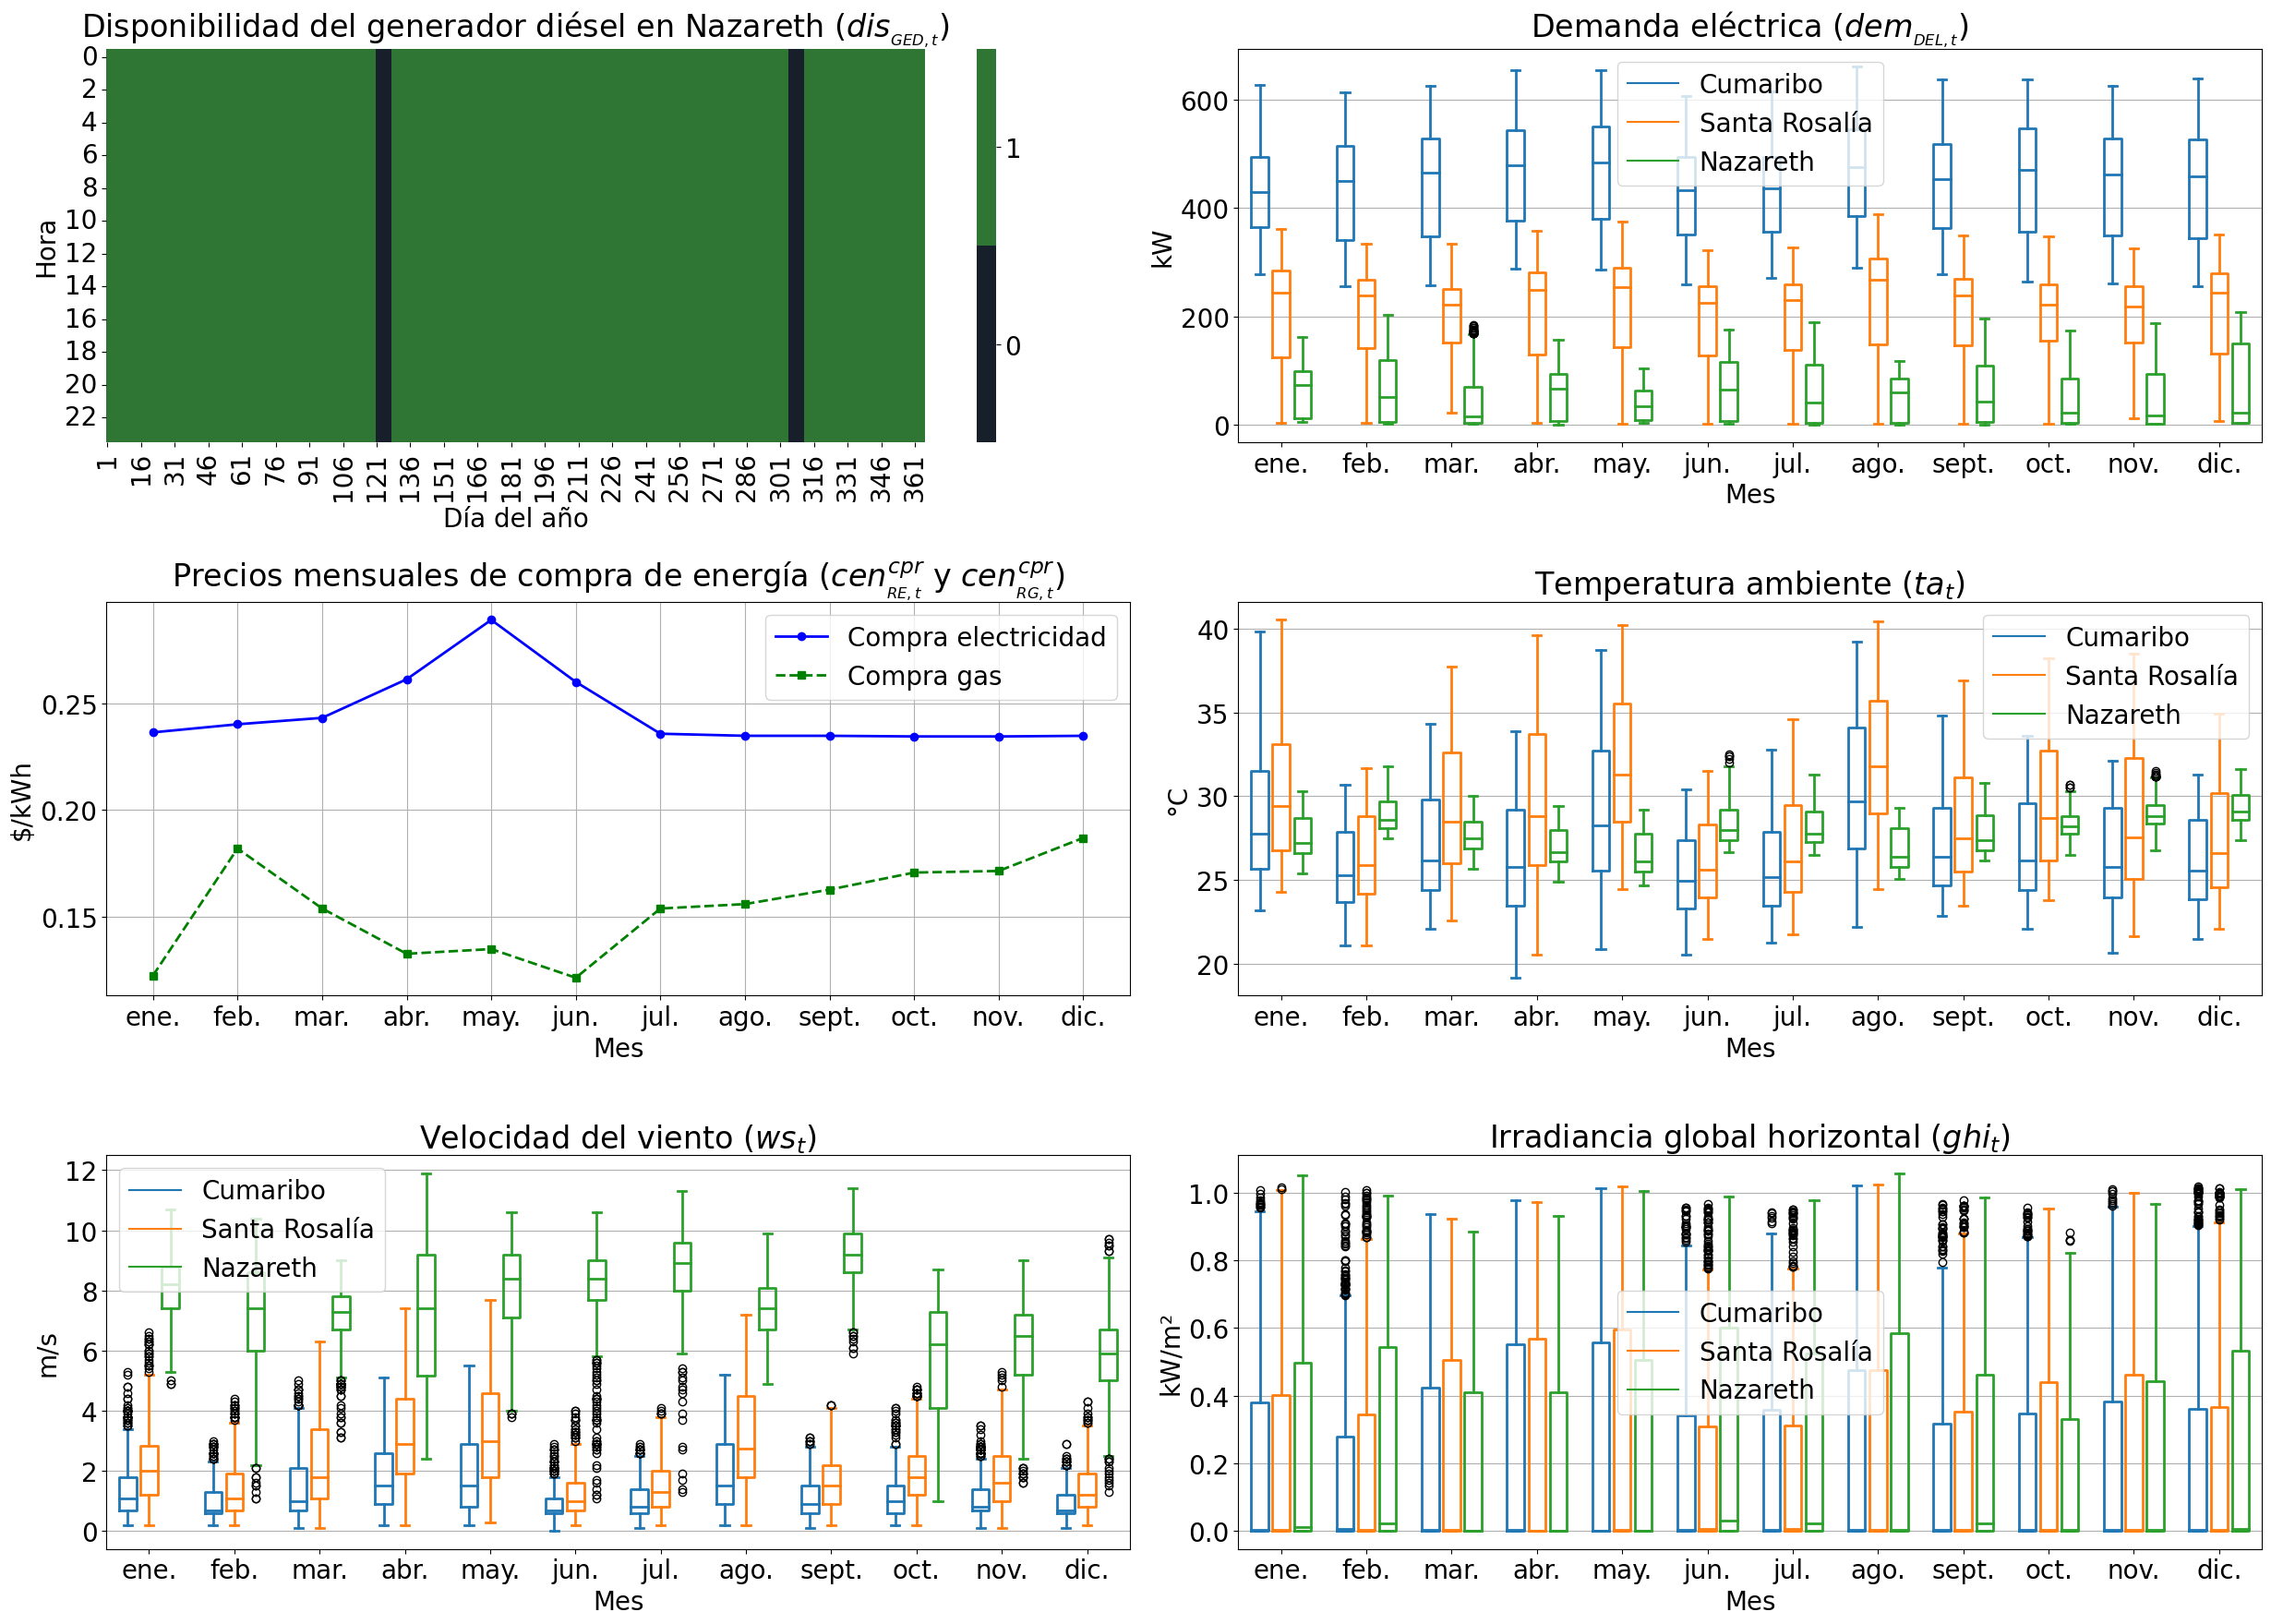

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale
import seaborn as sns
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

matplotlib.rcParams.update({'font.size': 20})
locale.setlocale(locale.LC_ALL, "es_CO.utf8")

fechas = pd.date_range(start='01/01/2019 00:00', end='31/12/2019 23:00', freq='1H')

data = {}
for key in maestros.keys():
    data[f"load_{key}"] = maestros[key]["maestro"].data_model["load_el"]["value"]
    data[f"temperature_{key}"] = maestros[key]["maestro"].df_meteo["Temperature"].to_numpy()
    data[f"wind_{key}"] = maestros[key]["maestro"].df_meteo["Wind Speed"].to_numpy()
    data[f"irr_{key}"] = maestros[key]["maestro"].df_meteo["GHI"].to_numpy()/1000

data["av_diesel"] = maestros["nazareth"]["maestro"].data_model["generator"]["av"]["value"]
data["buy_price_gas"] = maestros["nazareth"]["maestro"].data_model["grid_gas"]["buy_price"]["value"]
data["buy_price_el"] = maestros["nazareth"]["maestro"].data_model["grid_el"]["buy_price"]["value"]
# Cargar datos de temperatura y demanda eléctrica
fig_data = pd.DataFrame(index = fechas, data = data)
fig_data["day_year"] = fig_data.index.day_of_year
fig_data["month"] = fig_data.index.strftime("%b")
fig_data["month_number"] = fig_data.index.month
fig_data["hour"] = fig_data.index.hour


fig, ax = plt.subplots(3, 2, figsize=(25, 18))

##################################################################################
########### FIGURA DISPONIBILIDAD DIESEL
##################################################################################


myColors = ((23/255, 32/255, 42/255, 1.0), (47/255, 117/255, 51/255, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
sns.heatmap(fig_data.pivot(index="hour", columns="day_year", values="av_diesel"), ax = ax[0,0],  cmap=cmap, vmin = 0, vmax = 1, linewidths=0.0, rasterized=True)

ax[0,0].set_xlabel("Día del año")
ax[0,0].set_ylabel("Hora")
colorbar = ax[0,0].collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels([0,1])
ax[0,0].set_title("Disponibilidad del generador diésel en Nazareth ($dis_{_{GED,t}}$)")



##################################################################################
########### FIGURA COSTO DE ENERGÍA RED ELÉCTRICA
##################################################################################

fig_price = fig_data.groupby(by=["month"]).mean().sort_values("month_number")

# Gráfica de precios de compra y venta de electricidad
ax[1,0].plot(fig_price.index, fig_price.buy_price_el, marker='o', c='b', linestyle='-', linewidth=2, label="Compra electricidad")
# Agregar costo de compra de energía de la red de gas
ax[1,0].plot(fig_price.index, fig_price.buy_price_gas, marker='s', c='g', linestyle='--', linewidth=2, label="Compra gas")

# Configuración del gráfico
ax[1,0].set_title("Precios mensuales de compra de energía ($cen^{cpr}_{_{RE,t}}$ y $cen^{cpr}_{_{RG,t}}$)")
ax[1,0].set_xlabel("Mes")
ax[1,0].set_ylabel("$/kWh")
ax[1,0].grid()
ax[1,0].legend()

# Configurar etiquetas de los meses en el eje X
ticks = fig_price.index  # Nombres de los meses
ax[1,0].set_xticks(np.arange(len(ticks)))
ax[1,0].set_xticklabels(ticks)




##################################################################################
########### BOXPLOTs DE TEMPERATURA Y CARGA ELÉCTRICA
##################################################################################


# Crear listas de datos mensuales por caso de estudio
load_cumaribo_fig = [fig_data.loc[fig_data.month == i, "load_cumaribo"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
load_rosalia_fig = [fig_data.loc[fig_data.month == i, "load_rosalia"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
load_nazareth_fig = [fig_data.loc[fig_data.month == i, "load_nazareth"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]

temp_cumaribo_fig = [fig_data.loc[fig_data.month == i, "temperature_cumaribo"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
temp_rosalia_fig = [fig_data.loc[fig_data.month == i, "temperature_rosalia"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
temp_nazareth_fig = [fig_data.loc[fig_data.month == i, "temperature_nazareth"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]

wind_cumaribo_fig = [fig_data.loc[fig_data.month == i, "wind_cumaribo"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
wind_rosalia_fig = [fig_data.loc[fig_data.month == i, "wind_rosalia"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
wind_nazareth_fig = [fig_data.loc[fig_data.month == i, "wind_nazareth"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]

irr_cumaribo_fig = [fig_data.loc[fig_data.month == i, "irr_cumaribo"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
irr_rosalia_fig = [fig_data.loc[fig_data.month == i, "irr_rosalia"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]
irr_nazareth_fig = [fig_data.loc[fig_data.month == i, "irr_nazareth"].to_numpy() for i in np.unique(fig_data.month.to_numpy())]

# Definir colores para cada localidad
colors = {
    "Cumaribo": "#1f77b4",  # Azul
    "Santa Rosalía": "#ff7f0e",  # Naranja
    "Nazareth": "#2ca02c"  # Verde
}

# Crear función para asignar colores y leyenda
def define_box_properties(plot_name, color_code, label, ax, linewidth=2):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    
    for element in ['boxes', 'whiskers', 'caps', 'medians']:
        plt.setp(plot_name[element], color=color_code, linewidth=linewidth)
    
    ax.plot([], c=color_code, label=label)
    ax.legend()

# Obtener los nombres de los meses en español
a = fig_data.month.to_numpy()
indexes = np.unique(a, return_index=True)[1]
month_labels = [a[index] for index in sorted(indexes)]


# **Boxplots de demanda eléctrica (ax[0,1])**
load_cumaribo_plot = ax[0,1].boxplot(load_cumaribo_fig, positions=np.arange(len(load_cumaribo_fig))*2.0-0.5, widths=0.4)
load_rosalia_plot = ax[0,1].boxplot(load_rosalia_fig, positions=np.arange(len(load_rosalia_fig))*2.0, widths=0.4)
load_nazareth_plot = ax[0,1].boxplot(load_nazareth_fig, positions=np.arange(len(load_nazareth_fig))*2.0+0.5, widths=0.4)

define_box_properties(load_cumaribo_plot, colors["Cumaribo"], "Cumaribo", ax[0,1])
define_box_properties(load_rosalia_plot, colors["Santa Rosalía"], "Santa Rosalía", ax[0,1])
define_box_properties(load_nazareth_plot, colors["Nazareth"], "Nazareth", ax[0,1])

ax[0,1].set_xticks(np.arange(0, len(month_labels) * 2, 2))
ax[0,1].set_xticklabels(month_labels)
ax[0,1].set_title("Demanda eléctrica ($dem_{_{DEL,t}}$)")
ax[0,1].set_xlabel("Mes")
ax[0,1].set_ylabel("kW")
ax[0,1].grid(axis='y')

# **Boxplots de temperatura (ax[1,1])**
temp_cumaribo_plot = ax[1,1].boxplot(temp_cumaribo_fig, positions=np.arange(len(temp_cumaribo_fig))*2.0-0.5, widths=0.4)
temp_rosalia_plot = ax[1,1].boxplot(temp_rosalia_fig, positions=np.arange(len(temp_rosalia_fig))*2.0, widths=0.4)
temp_nazareth_plot = ax[1,1].boxplot(temp_nazareth_fig, positions=np.arange(len(temp_nazareth_fig))*2.0+0.5, widths=0.4)

define_box_properties(temp_cumaribo_plot, colors["Cumaribo"], "Cumaribo", ax[1,1])
define_box_properties(temp_rosalia_plot, colors["Santa Rosalía"], "Santa Rosalía", ax[1,1])
define_box_properties(temp_nazareth_plot, colors["Nazareth"], "Nazareth", ax[1,1])

ax[1,1].set_xticks(np.arange(0, len(month_labels) * 2, 2))
ax[1,1].set_xticklabels(month_labels)
ax[1,1].set_title("Temperatura ambiente ($ta_{t}$)")
ax[1,1].set_xlabel("Mes")
ax[1,1].set_ylabel("°C")
ax[1,1].grid(axis='y')

# **Boxplots de velocidad del viento (ax[2,0])**
wind_cumaribo_plot = ax[2,0].boxplot(wind_cumaribo_fig, positions=np.arange(len(wind_cumaribo_fig))*2.0-0.5, widths=0.4)
wind_rosalia_plot = ax[2,0].boxplot(wind_rosalia_fig, positions=np.arange(len(wind_rosalia_fig))*2.0, widths=0.4)
wind_nazareth_plot = ax[2,0].boxplot(wind_nazareth_fig, positions=np.arange(len(wind_nazareth_fig))*2.0+0.5, widths=0.4)

define_box_properties(wind_cumaribo_plot, colors["Cumaribo"], "Cumaribo", ax[2,0])
define_box_properties(wind_rosalia_plot, colors["Santa Rosalía"], "Santa Rosalía", ax[2,0])
define_box_properties(wind_nazareth_plot, colors["Nazareth"], "Nazareth", ax[2,0])

ax[2,0].set_xticks(np.arange(0, len(month_labels) * 2, 2))
ax[2,0].set_xticklabels(month_labels)
ax[2,0].set_title("Velocidad del viento ($ws_{t}$)")
ax[2,0].set_xlabel("Mes")
ax[2,0].set_ylabel("m/s")
ax[2,0].grid(axis='y')

# **Boxplots de irradiancia (ax[2,1])**
irr_cumaribo_plot = ax[2,1].boxplot(irr_cumaribo_fig, positions=np.arange(len(irr_cumaribo_fig))*2.0-0.5, widths=0.4)
irr_rosalia_plot = ax[2,1].boxplot(irr_rosalia_fig, positions=np.arange(len(irr_rosalia_fig))*2.0, widths=0.4)
irr_nazareth_plot = ax[2,1].boxplot(irr_nazareth_fig, positions=np.arange(len(irr_nazareth_fig))*2.0+0.5, widths=0.4)

define_box_properties(irr_cumaribo_plot, colors["Cumaribo"], "Cumaribo", ax[2,1])
define_box_properties(irr_rosalia_plot, colors["Santa Rosalía"], "Santa Rosalía", ax[2,1])
define_box_properties(irr_nazareth_plot, colors["Nazareth"], "Nazareth", ax[2,1])

ax[2,1].set_xticks(np.arange(0, len(month_labels) * 2, 2))
ax[2,1].set_xticklabels(month_labels)
ax[2,1].set_title("Irradiancia global horizontal ($ghi_{t}$)")
ax[2,1].set_xlabel("Mes")
ax[2,1].set_ylabel("kW/m²")
ax[2,1].grid(axis='y')

# Ajustar el diseño de la figura
fig.tight_layout()
plt.savefig('Figuras/pdf/casos_series_params.pdf', format='pdf', transparent=True)
plt.show()


In [3]:
for key in maestros.keys():
    print(f"\n -------DIMENSIONAMIENTO DE {key}-------- \n".upper())
    # Imprimir el valor de todas las variables cuyo nombre comience con "X_"
    for var in maestros[key]["maestro"].model_escenarios["main_main"]._mpisppy_node_list[0].nonant_vardata_list:
        print(f"{var.name} = {var.value}")
        


 -------DIMENSIONAMIENTO DE CUMARIBO-------- 

X_PV[Risen-590W,HYD-20kTL] = 1627.0
X_PVs[Risen-590W,HYD-20kTL] = 71.0
X_PT[Termoflat 250] = 0.0
X_PT[VacuumTube Elite 300] = 0.0
X_AT[AT por sales fundidas - 5 kWh] = 4.0
X_AT[Tanque agua presurizada - 5kWh] = 1.0
X_B[PylonTech-UP5000,HYD-20kTL] = 56.0
X_Bs[PylonTech-UP5000,HYD-20kTL] = 7.0
X_CH[Risen-590W,PylonTech-UP5000,HYD-20kTL] = 32.0
Y_CH[Risen-590W,PylonTech-UP5000,HYD-20kTL] = 1
X_WT[FX-20kW] = 0.0
X_WT[TUGE-10kW] = 0.0
X_BOI[Type 1 - 10kWth] = 1.0
X_BOI[Type 1 - 5kWth] = 0.0
X_EH[CompactHeat 500] = 0.0
X_EH[PowerHeat 3000] = 3.0
X_CHP[Microturbina de Gas] = 1.0
X_CHP[Motor Reciprocante de Gas Natural] = 2.0
X_AC[Compacto 1 etapas - 20 kW] = 0.0
X_AC[Compacto 2 etapas - 30 kW] = 0.0
X_EC[CoolCompact 10] = 0.0
X_EC[PowerCool 50] = 1.0
Y_NEEDS['Calentar agua (E: Estufa electrica, C: Sistema control de calor) ',Calor] = 1
Y_NEEDS['Calentar agua (E: Estufa electrica, C: Sistema control de calor) ',Electrico] = 0
Y_NEEDS['Calentar ag

In [4]:
from pyomo.environ import value
import pandas as pd
import numpy as np

def format_numeric_columns(df):    
    return df.applymap(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")) 

res_economicos = pd.DataFrame()

for key in maestros.keys():

    m = maestros[key]["maestro"].model_escenarios["main_main"]

    res_economicos.loc[r"Costos de inversión ($\bb{C}^{\scalebox{0.6}{inv}}$)", key] = value(
        m.d_cost_inst            
        + sum(m.X_PV[tpv,tch]*(m.pv_f['C_inst',tpv]) for tch in m.ch_u for tpv in m.pv_u)
        + sum(m.X_PT[tpt]*(m.pt_f['C_inst',tpt]) for tpt in m.pt_u)
        + sum(m.X_AT[tat]*(m.at_f['C_inst',tat]) for tat in m.at_u)
        + sum(m.X_B[tb,tch]*(m.bat_f['C_inst',tb]) for tch in m.ch_u for tb in m.bat_u)
        + sum(sum(m.X_CH[tpv,tb,tch] for tb in m.bat_u for tpv in m.pv_u)*(m.ch_f['C_inst',tch]) for tch in m.ch_u)
        + sum(m.X_WT[tt]*(m.wt_f['C_inst',tt]) for tt in m.wt_u) 
        + sum(m.X_BOI[tboi]*m.boi_f['C_inst',tboi] for tboi in m.boi_u)
        + sum(m.X_EH[teh]*m.eh_f['C_inst',teh] for teh in m.eh_u)
        + sum(m.X_CHP[tchp]*m.chp_f['C_inst',tchp] for tchp in m.chp_u)
        + sum(m.X_AC[tac]*m.ac_f['C_inst',tac] for tac in m.ac_u)
        + sum(m.X_EC[tec]*m.ec_f['C_inst',tec] for tec in m.ec_u)
    )

    res_economicos.loc[r"Costos de OM fijos ($\bb{C}^{\scalebox{0.6}{om,fij}}$)", key] = value(
        sum(m.X_PV[tpv,tch]*(m.VPN_FS*m.pv_f['C_OM_y',tpv]) for tch in m.ch_u for tpv in m.pv_u)
        + sum(m.X_PT[tpt]*(m.VPN_FS*m.pt_f['C_OM_y',tpt]) for tpt in m.pt_u)
        + sum(m.X_AT[tat]*(m.VPN_FS*m.at_f['C_OM_y',tat]) for tat in m.at_u)
        + sum(m.X_B[tb,tch]*(m.VPN_FS*m.bat_f['C_OM_y',tb]) for tch in m.ch_u for tb in m.bat_u)
        + sum(sum(m.X_CH[tpv,tb,tch] for tb in m.bat_u for tpv in m.pv_u)*(m.VPN_FS*m.ch_f['C_OM_y',tch]) for tch in m.ch_u)
        + sum(m.X_WT[tt]*(m.VPN_FS*m.wt_f['C_OM_y',tt]) for tt in m.wt_u) 
    ) 

    res_economicos.loc[r"Costos de reemplazo ($\bb{C}^{\scalebox{0.6}{rem}}$)", key] = value(
        sum(sum(m.VPN_F[ii]*m.ch_f['C_inst',tch]*sum(m.X_CH[tpv,tb,tch] for tb in m.bat_u for tpv in m.pv_u) for ii in np.arange(int(m.ch_f['ty',tch]),m.lifeyears,int(m.ch_f['ty',tch]))) for tch in m.ch_u)
        + sum(sum(m.VPN_F[ii]*m.bat_f['C_inst',tb]*sum(m.X_B[tb,tch] for tch in m.ch_u) for ii in np.arange(int(m.bat_f['ty',tb]),m.lifeyears,int(m.bat_f['ty',tb]))) for tb in m.bat_u)
        + sum(sum(m.VPN_F[ii]*m.at_f['C_inst',tat]*m.X_AT[tat] for ii in np.arange(int(m.at_f['ty',tat]),m.lifeyears,int(m.at_f['ty',tat]))) for tat in m.at_u)
        + sum(sum(m.VPN_F[ii]*m.pt_f['C_inst',tpt]*m.X_PT[tpt] for ii in np.arange(int(m.pt_f['ty',tpt]),m.lifeyears,int(m.pt_f['ty',tpt]))) for tpt in m.pt_u)
        + sum(sum(m.VPN_F[ii]*m.wt_f['C_inst',tt]*m.X_WT[tt] for ii in np.arange(int(m.wt_f['ty',tt]),m.lifeyears,int(m.wt_f['ty',tt]))) for tt in m.wt_u)            
        + sum(sum(m.VPN_F[ii]*m.boi_f['C_inst',tboi]*m.X_BOI[tboi] for ii in np.arange(int(m.boi_f['ty',tboi]),m.lifeyears,int(m.boi_f['ty',tboi]))) for tboi in m.boi_u)
        + sum(sum(m.VPN_F[ii]*m.eh_f['C_inst',teh]*m.X_EH[teh] for ii in np.arange(int(m.eh_f['ty',teh]),m.lifeyears,int(m.eh_f['ty',teh]))) for teh in m.eh_u)
        + sum(sum(m.VPN_F[ii]*m.chp_f['C_inst',tchp]*m.X_CHP[tchp] for ii in np.arange(int(m.chp_f['ty',tchp]),m.lifeyears,int(m.chp_f['ty',tchp]))) for tchp in m.chp_u)
        + sum(sum(m.VPN_F[ii]*m.ac_f['C_inst',tac]*m.X_AC[tac] for ii in np.arange(int(m.ac_f['ty',tac]),m.lifeyears,int(m.ac_f['ty',tac]))) for tac in m.ac_u)
        + sum(sum(m.VPN_F[ii]*m.ec_f['C_inst',tec]*m.X_EC[tec] for ii in np.arange(int(m.ec_f['ty',tec]),m.lifeyears,int(m.ec_f['ty',tec]))) for tec in m.ec_u)
    ) 

    res_economicos.loc[r"Costos de la red eléctrica ($\bb{C}^{\scalebox{0.6}{RE}}$)", key] = 0
    res_economicos.loc[r"Costos de la red de gas ($\bb{C}^{\scalebox{0.6}{RG}}_{t}$)", key] = 0
    res_economicos.loc[r"Costos del generador diésel ($\bb{C}^{\scalebox{0.6}{GED}}_{t}$)", key] = 0
    res_economicos.loc[r"Costos de OM variables ($\bb{C}^{\scalebox{0.6}{om,var}}_{t}$)", key] = 0
    res_economicos.loc[r"Recaudos e ingresos ($ \bb{RI}_{t}$)", key] = 0
    res_economicos.loc[r"Costos por energía no suministrada y desvío ($\bb{C}^{\scalebox{0.6}{dpd,ncs}}_t$)", key] = 0

    
    
    for esc in maestros[key]["maestro"].escenarios:
        m = maestros[key]["maestro"].model_escenarios[esc]

        res_economicos.loc[r"Costos de la red eléctrica ($\bb{C}^{\scalebox{0.6}{RE}}$)", key] += m._mpisppy_probability*value(
            m.VPN_FS*sum(m.price_buy_grid_el[t]*(m.PEL_G_L[t] + m.PEL_G_EC[t] + m.PEL_G_EH[t] + m.PEL_G_B[t]) for t in m.T)
        )

        res_economicos.loc[r"Costos de la red de gas ($\bb{C}^{\scalebox{0.6}{RG}}_{t}$)", key] += m._mpisppy_probability*value(
            m.VPN_FS*sum(m.price_buy_grid_gas[t]*(sum(m.PPE_GAS_BOI[t,tboi] for tboi in m.boi_u) + sum(m.PPE_GAS_CHP[t,tchp] for tchp in m.chp_u)) for t in m.T)
        )

        res_economicos.loc[r"Costos del generador diésel ($\bb{C}^{\scalebox{0.6}{GED}}_{t}$)", key] += m._mpisppy_probability*value(
            m.VPN_FS*sum(m.d_fuel_cost*(m.d_f_min*m.Y_D[t] + m.d_fm*(m.PEL_D_L[t] + m.PEL_D_EC[t] + m.PEL_D_EH[t] + m.PEL_D_B[t])) for t in m.T)
        )

        res_economicos.loc[r"Costos de OM variables ($\bb{C}^{\scalebox{0.6}{om,var}}_{t}$)", key] += m._mpisppy_probability*value(
            m.VPN_FS*sum(                        
                m.d_cost_om*(m.PEL_D_L[t] + m.PEL_D_EC[t] + m.PEL_D_EH[t] + m.PEL_D_B[t])
                + sum(m.PTH_BOI[t,tboi]*m.boi_f['C_OM_kWh',tboi] for tboi in m.boi_u)
                + sum(m.PTH_EH[t,teh]*m.eh_f['C_OM_kWh',teh] for teh in m.eh_u)
                + sum(m.PEL_CHP[t,tchp]*m.chp_f['C_OM_kWh',tchp] for tchp in m.chp_u)
                + sum(m.PCL_AC[t,tac]*m.ac_f['C_OM_kWh',tac] for tac in m.ac_u)
                + sum(m.PCL_EC[t,tec]*m.ec_f['C_OM_kWh',tec] for tec in m.ec_u)             
            for t in m.T)
        )

        res_economicos.loc[r"Recaudos e ingresos ($ \bb{RI}_{t}$)", key] += m._mpisppy_probability*value(
            m.VPN_FS*sum(  
                m.price_sell_grid_el[t]*(m.PEL_PV_G[t] + m.PEL_WT_G[t] + m.PEL_CHP_G[t])
                - m.EnvC*sum(sum(m.X_PV[tpv,tch]*m.p_pv_gen[t,tpv] for tpv in m.pv_u) - m.PEL_PV_CUR[tch,t] for tch in m.ch_u)
                - m.EnvC*(sum(m.X_WT[tt]*m.p_wt_gen[t,tt] for tt in m.wt_u) - m.PEL_WT_CUR[t]) 
                - m.EnvC*(sum(m.X_PT[tpt]*m.p_pt_gen[t,tpt] for tpt in m.pt_u) - m.PTH_PT_CUR[t])
                
            for t in m.T)
        )

        res_economicos.loc[r"Costos por energía no suministrada y desvío ($\bb{C}^{\scalebox{0.6}{dpd,ncs}}_t$)", key] += m._mpisppy_probability*value(
            m.VPN_FS*sum(
                m.cost_ens_el[t]*m.PEL_NS[t] + m.cost_des_th[t]*m.PTH_DES[t] + m.cost_des_cl[t]*m.PCL_DES[t]
            for t in m.T)
        )
    
res_economicos.loc[r"\textbf{Valor función objetivo ($\bb{Obj}$) (CPN)}",:] = res_economicos.sum(axis=0)
res_economicos = format_numeric_columns(res_economicos)
res_economicos.to_excel(f'RESULTADOS/economicos_{"estocastico" if maestros[key]["maestro"].estocastico else "determinista"}.xlsx')
res_economicos



,cumaribo,nazareth,rosalia
Costos de inversión ($\bb{C}^{\scalebox{0.6}{inv}}$),"1.188.397,54","469.239,18","1.181.762,36"
"Costos de OM fijos ($\bb{C}^{\scalebox{0.6}{om,fij}}$)","281.136,58","93.067,66","238.152,25"
Costos de reemplazo ($\bb{C}^{\scalebox{0.6}{rem}}$),"178.727,50","115.754,10","320.122,05"
Costos de la red eléctrica ($\bb{C}^{\scalebox{0.6}{RE}}$),"56.116,94","52.056,14","114.215,02"
Costos de la red de gas ($\bb{C}^{\scalebox{0.6}{RG}}_{t}$),"2.267.152,45","2.722,94","624.929,98"
Costos del generador diésel ($\bb{C}^{\scalebox{0.6}{GED}}_{t}$),"0,00","0,00","0,00"
"Costos de OM variables ($\bb{C}^{\scalebox{0.6}{om,var}}_{t}$)","253.979,54","30.420,73","87.820,64"
Recaudos e ingresos ($ \bb{RI}_{t}$),"-16.109,30","-10.147,01","-13.586,06"
"Costos por energía no suministrada y desvío ($\bb{C}^{\scalebox{0.6}{dpd,ncs}}_t$)","161.480,91","109.482,60","160.594,41"
\textbf{Valor función objetivo ($\bb{Obj}$) (CPN)},"4.370.882,16","862.596,33","2.714.010,64"


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pyomo.environ import value as vpyo

def obtener_flujos(maestro):
    # Inicializar diccionario vacío para la suma acumulada
    flujos_energia_base = {}

    for esc in maestro.escenarios:
        m = maestro.model_escenarios[esc]
        prob = m._mpisppy_probability  # Probabilidad del escenario
        
        # Flujos del escenario ponderados por la probabilidad
        flujos_escenario = {
            "Paneles fotovoltaicos → Inversores": sum(sum(sum(m.X_PV[tpv,tch] * m.p_pv_gen[t,tpv] for tpv in m.pv_u) - m.PEL_PV_CUR[tch,t] for tch in m.ch_u) for t in m.T),
            "Paneles fotovoltaicos → Recorte PF": sum(sum(m.PEL_PV_CUR[tch,t] for tch in m.ch_u) for t in m.T),
            "Inversores → Baterías": sum(m.PEL_PV_B[tch,tb,t] + m.ch_f['n_acdc',tch] * m.PEL_CAR_B[tch,tb,t] for tch in m.ch_u for tb in m.bat_u for t in m.T),
            "Baterías → Inversores": sum(m.PEL_DES_B[tch,tb,t] for tb in m.bat_u for tch in m.ch_u for t in m.T),
            "Inversores → Demanda eléctrica": sum(m.PEL_B_L[t] + m.PEL_PV_L[t] for t in m.T),
            "Inversores → Calentadores eléctricos": sum(m.PEL_B_EH[t] + m.PEL_PV_EH[t] for t in m.T),
            "Inversores → Enfriadores eléctricos": sum(m.PEL_B_EC[t] + m.PEL_PV_EC[t] for t in m.T),
            "Microturbinas eólicas → Demanda eléctrica": sum(m.PEL_WT_L[t] for t in m.T),
            "Microturbinas eólicas → Calentadores eléctricos": sum(m.PEL_WT_EH[t] for t in m.T),
            "Microturbinas eólicas → Enfriadores eléctricos": sum(m.PEL_WT_EC[t] for t in m.T),
            "Microturbinas eólicas → Inversores": sum(m.PEL_WT_B[t] for t in m.T),
            "Microturbinas eólicas → Recorte ME": sum(m.PEL_WT_CUR[t] for t in m.T),
            "Generador diésel → Demanda eléctrica": sum(m.PEL_D_L[t] for t in m.T),
            "Generador diésel → Calentadores eléctricos": sum(m.PEL_D_EH[t] for t in m.T),
            "Generador diésel → Enfriadores eléctricos": sum(m.PEL_D_EC[t] for t in m.T),
            "Generador diésel → Inversores": sum(m.PEL_D_B[t] for t in m.T),
            "Red eléctrica → Demanda eléctrica": sum(m.PEL_G_L[t] for t in m.T),
            "Red eléctrica → Calentadores eléctricos": sum(m.PEL_G_EH[t] for t in m.T),
            "Red eléctrica → Enfriadores eléctricos": sum(m.PEL_G_EC[t] for t in m.T),
            "Red eléctrica → Inversores": sum(m.PEL_G_B[t] for t in m.T),
            "CHP → Demanda eléctrica": sum(m.PEL_CHP_L[t] for t in m.T),
            "CHP → Calentadores eléctricos": sum(m.PEL_CHP_EH[t] for t in m.T),
            "CHP → Enfriadores eléctricos": 35*sum(m.PEL_CHP_EC[t] for t in m.T),
            "CHP → Inversores": sum(m.PEL_CHP_B[t] for t in m.T),
            "CHP → Enfriadores de absorción": sum(m.PTH_CHP_AC[t] for t in m.T),
            "CHP → Demanda de calor": sum(m.PTH_CHP_L[t] for t in m.T),
            "CHP → Almacenamiento de calor": sum(m.PTH_CHP_AT[t] for t in m.T),
            "Calderas → Enfriadores de absorción": sum(m.PTH_BOI_AC[t] for t in m.T),
            "Calderas → Demanda de calor": sum(m.PTH_BOI_L[t] for t in m.T),
            "Calderas → Almacenamiento de calor": sum(m.PTH_BOI_AT[t] for t in m.T),
            "Almacenamiento de calor → Enfriadores de absorción": sum(m.PTH_AT_AC[t] for t in m.T),
            "Almacenamiento de calor → Demanda de calor": sum(m.PTH_AT_L[t] for t in m.T),
            "Térmica solar → Enfriadores de absorción": sum(m.PTH_PT_AC[t] for t in m.T),
            "Térmica solar → Demanda de calor": sum(m.PTH_PT_L[t] for t in m.T),
            "Térmica solar → Almacenamiento de calor": sum(m.PTH_PT_AT[t] for t in m.T),
            "Red de gas → CHP": 2*sum(m.PPE_GAS_CHP[t,tchp] for tchp in m.chp_u for t in m.T),
            "Red de gas → Calderas": 8*sum(m.PPE_GAS_BOI[t,tboi] for tboi in m.boi_u for t in m.T),
            "Enfriadores de absorción → Demanda de enfriamiento": sum(m.PCL_AC[t,tac] for tac in m.ac_u for t in m.T),
            "Enfriadores eléctricos → Demanda de enfriamiento": sum(m.PCL_EC[t,tec] for tec in m.ec_u for t in m.T),
            "Demanda de enfriamiento → Desvío DEN": sum(m.PCL_DES[t] for t in m.T),
            "Demanda de calor → Desvío DCL": sum(m.PTH_DES[t] for t in m.T),
            "Demanda eléctrica → Energía no suministrada": sum(m.PEL_NS[t] for t in m.T),
            "Calentadores eléctricos → Enfriadores de absorción": sum(m.PTH_EH_AC[t] for t in m.T),
            "Calentadores eléctricos → Demanda de calor": sum(m.PTH_EH_L[t] for t in m.T),
            "Calentadores eléctricos → Almacenamiento de calor": sum(m.PTH_EH_AT[t] for t in m.T),
        }        

        # Sumar valores ponderados al total
        for key, value in flujos_escenario.items():
            flujos_energia_base[key] = flujos_energia_base.get(key, 0) + prob * vpyo(value)

    # Filtrar valores menores a 10
    flujos_energia_base = {k: v for k, v in flujos_energia_base.items() if v >= 10}

    return flujos_energia_base.copy()


def sankey_individual(maestros):
    color_nodos = [
        "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A",
        "#19D3F3", "#FF6692", "#B6E880", "#FF97FF", "#FECB52"
    ]
    color_enlaces = "rgba(99, 110, 250, 0.6)"  # Azul semitransparente

    for key, items in maestros.items():
        
        flujos_energia = obtener_flujos(items["maestro"])

        nodos_unicos = list(set([k.split(" → ")[0] for k in flujos_energia.keys()] + 
                                [k.split(" → ")[1] for k in flujos_energia.keys()]))
        indices = {nodo: i for i, nodo in enumerate(nodos_unicos)}

        sources = [indices[k.split(" → ")[0]] for k in flujos_energia.keys()]
        targets = [indices[k.split(" → ")[1]] for k in flujos_energia.keys()]
        values = list(flujos_energia.values())
        labels = nodos_unicos

        nodos_color = [color_nodos[i % len(color_nodos)] for i in range(len(labels))]

        sankey = go.Figure(go.Sankey(
            node=dict(
                pad=20,
                thickness=30,
                line=dict(color="black", width=0.5),
                label=labels,
                color=nodos_color
            ),
            link=dict(
                source=sources,
                target=targets,
                value=values,
                color=color_enlaces,
                hovertemplate='%{source.label} → %{target.label}: %{value:.2f} kW<extra></extra>'
            )
        ))

        sankey.update_layout(
            title_text=f'Diagrama de Sankey - {key.capitalize() if key != "rosalia" else "Santa Rosalía"}',
            font=dict(size=18, color="black"),
            height=500,
            showlegend=False
        )

        sankey.show()

# Llamar la función con el diccionario maestros
sankey_individual(maestros)
